In [2]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
%matplotlib inline

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Encode 'gender' column if present
if 'gender' in X_resampled.columns:
    le = LabelEncoder()
    X_resampled['gender'] = le.fit_transform(X_resampled['gender'])

# Fill missing values with 0
X_resampled = X_resampled.fillna(0)

# Flatten y_resampled if it's multi-dimensional
if len(y_resampled.shape) > 1:
    y_resampled = y_resampled.values.ravel()

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000)  # Added Logistic Regression
}

# Cross-validation setup
cv_scoring = 'accuracy'  # Can also use 'f1_weighted', 'roc_auc_ovr' for multi-class
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate models
for model_name, model in models.items():
    try:
        scores = cross_val_score(
            model,
            X_resampled,
            y_resampled,
            cv=stratified_kfold,
            scoring=cv_scoring,
            n_jobs=-1,
            error_score='raise' 
        )
        print("=" * 50)
        print(f"Model: {model_name}")
        print(f"Scores: {scores}")
        print(f"Mean Accuracy: {scores.mean():.4f}")
    except Exception as e:
        print("=" * 50)
        print(f"Model: {model_name} failed with error:")
        print(e)


Model: Decision Tree
Scores: [0.5497076  0.54532164 0.53508772 0.53654971 0.52631579]
Mean Accuracy: 0.5386
Model: Random Forest
Scores: [0.54532164 0.54824561 0.54824561 0.52777778 0.53947368]
Mean Accuracy: 0.5418
Model: SVM
Scores: [0.51315789 0.51169591 0.49707602 0.48245614 0.49561404]
Mean Accuracy: 0.5000
Model: Logistic Regression
Scores: [0.45760234 0.4619883  0.45906433 0.41666667 0.46637427]
Mean Accuracy: 0.4523


In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Encode 'gender' column if present
if 'gender' in X_resampled.columns:
    le = LabelEncoder()
    X_resampled['gender'] = le.fit_transform(X_resampled['gender'])

# Fill missing values with 0
X_resampled = X_resampled.fillna(0)

# Flatten y_resampled if it's multi-dimensional
if len(y_resampled.shape) > 1:
    y_resampled = y_resampled.values.ravel()

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000)  # Added Logistic Regression
}

# Cross-validation setup
cv_scoring = 'accuracy'  # Can also use 'f1_weighted', 'roc_auc_ovr' for multi-class
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate models
for model_name, model in models.items():
    try:
        scores = cross_val_score(
            model,
            X_resampled,
            y_resampled,
            cv=stratified_kfold,
            scoring=cv_scoring,
            n_jobs=-1,
            error_score='raise' 
        )
        print("=" * 50)
        print(f"Model: {model_name}")
        print(f"Scores: {scores}")
        print(f"Mean Accuracy: {scores.mean():.4f}")
    except Exception as e:
        print("=" * 50)
        print(f"Model: {model_name} failed with error:")
        print(e)


Model: Decision Tree
Scores: [0.5497076  0.54385965 0.53508772 0.53654971 0.52631579]
Mean Accuracy: 0.5383
Model: Random Forest
Scores: [0.5628655  0.5497076  0.54239766 0.54678363 0.52923977]
Mean Accuracy: 0.5462
Model: SVM
Scores: [0.51315789 0.51169591 0.49707602 0.48245614 0.49561404]
Mean Accuracy: 0.5000
Model: Logistic Regression
Scores: [0.45760234 0.4619883  0.45906433 0.41666667 0.46637427]
Mean Accuracy: 0.4523


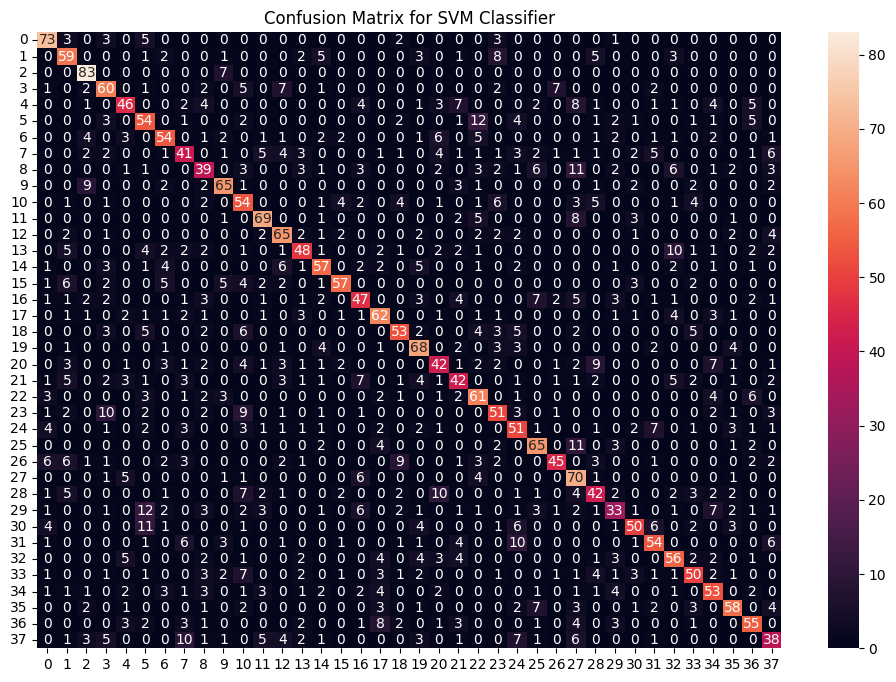

In [21]:
cf_matrix_svm = confusion_matrix(y_resampled, svm_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix_svm, annot=True, fmt="d")
plt.title("Confusion Matrix for SVM Classifier")
plt.show()


In [22]:
svm_model = SVC()
svm_model.fit(X_resampled, y_resampled)
svm_preds = svm_model.predict(X_resampled)

print(f"SVM Accuracy: {accuracy_score(y_resampled, svm_preds) * 100:.2f}%")

SVM Accuracy: 60.53%


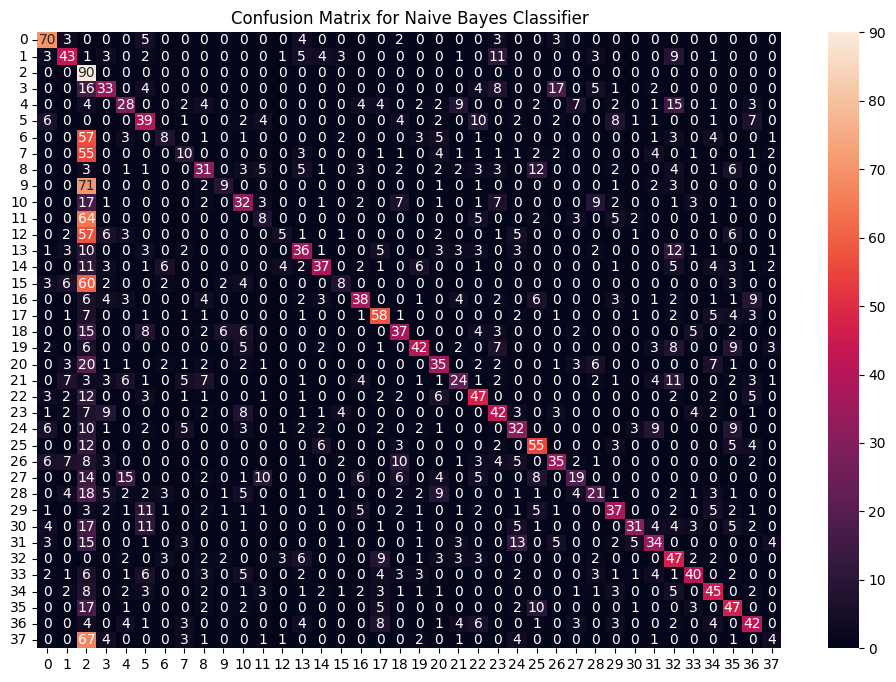

Naive Bayes Accuracy: 37.98%


In [8]:
nb_model = GaussianNB()
nb_model.fit(X_resampled, y_resampled)
nb_preds = nb_model.predict(X_resampled)

cf_matrix_nb = confusion_matrix(y_resampled, nb_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix_nb, annot=True, fmt="d")
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.show()

print(f"Naive Bayes Accuracy: {accuracy_score(y_resampled, nb_preds) * 100:.2f}%")

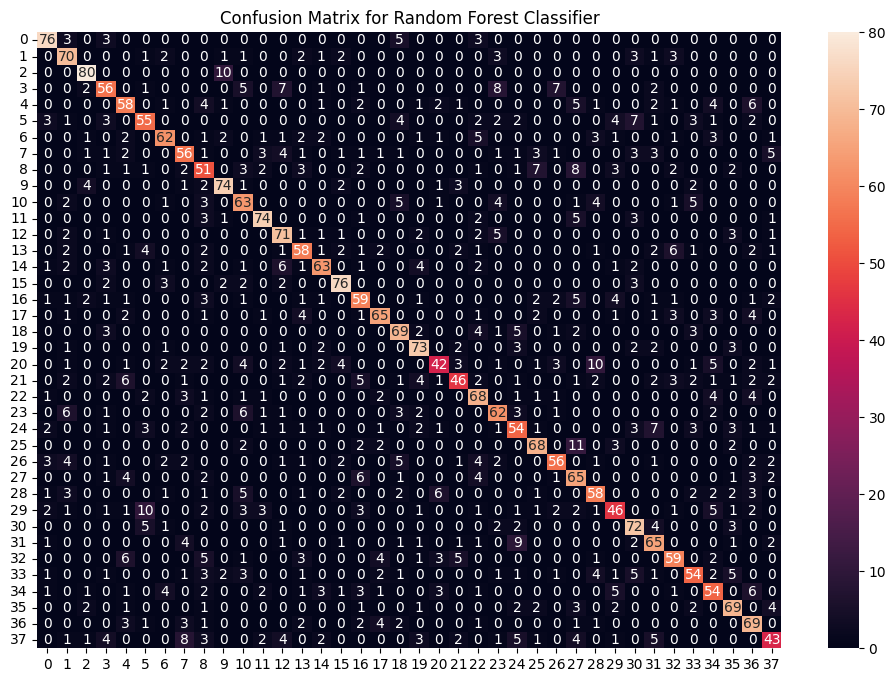

In [20]:
cf_matrix_rf = confusion_matrix(y_resampled, rf_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix_rf, annot=True, fmt="d")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

In [19]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)
rf_preds = rf_model.predict(X_resampled)


print(f"Random Forest Accuracy: {accuracy_score(y_resampled, rf_preds) * 100:.2f}%")

Random Forest Accuracy: 68.98%


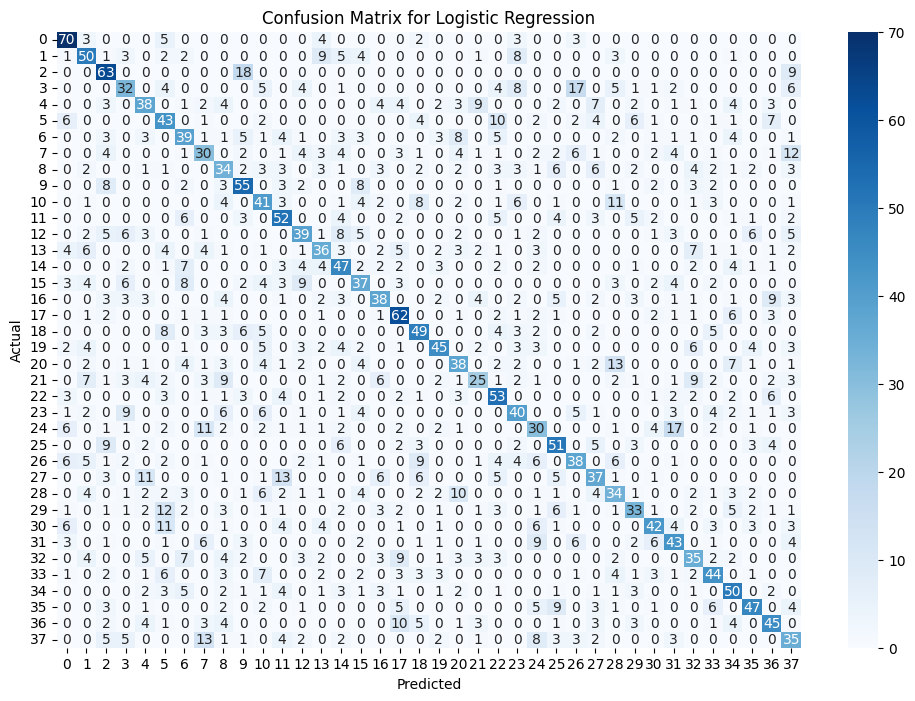

Logistic Regression Accuracy: 47.37%


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_resampled, y_resampled)
lr_preds = lr_model.predict(X_resampled)

# Confusion matrix
cf_matrix_lr = confusion_matrix(y_resampled, lr_preds)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print accuracy
print(f"Logistic Regression Accuracy: {accuracy_score(y_resampled, lr_preds) * 100:.2f}%")


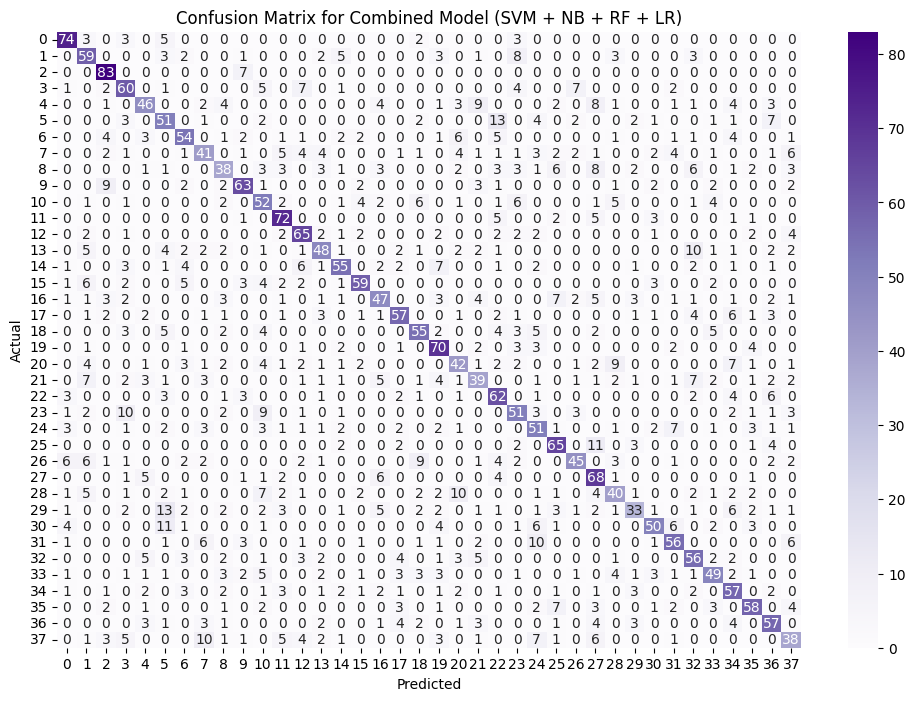

Combined Model Accuracy: 60.41%


In [11]:
from statistics import mode
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have these model predictions:
# svm_preds, nb_preds, rf_preds, and now lr_preds

# Combine all four models using majority voting
final_preds = [mode([i, j, k, l]) for i, j, k, l in zip(svm_preds, nb_preds, rf_preds, lr_preds)]

# Confusion matrix for combined model
cf_matrix_combined = confusion_matrix(y_resampled, final_preds)

plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix_combined, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix for Combined Model (SVM + NB + RF + LR)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print accuracy
print(f"Combined Model Accuracy: {accuracy_score(y_resampled, final_preds) * 100:.2f}%")


In [14]:
from statistics import mode
import pandas as pd

# Assuming 'encoder' is your LabelEncoder for target labels
# and models rf_model, nb_model, svm_model, lr_model are already trained

symptoms = X.columns.values
symptom_index = {symptom: idx for idx, symptom in enumerate(symptoms)}

def predict_disease(input_symptoms):
    input_symptoms = input_symptoms.split(",")
    input_data = [0] * len(symptom_index)
    
    # Mark input symptoms as present
    for symptom in input_symptoms:
        if symptom.strip() in symptom_index:
            input_data[symptom_index[symptom.strip()]] = 1

    input_df = pd.DataFrame([input_data], columns=symptoms)

    # Predictions from each model
    rf_pred = encoder.classes_[rf_model.predict(input_df)[0]]
    nb_pred = encoder.classes_[nb_model.predict(input_df)[0]]
    svm_pred = encoder.classes_[svm_model.predict(input_df)[0]]
    lr_pred = encoder.classes_[lr_model.predict(input_df)[0]]

    # Final prediction via majority voting
    final_pred = mode([rf_pred, nb_pred, svm_pred, lr_pred])
    
    return {
        "Random Forest Prediction": rf_pred,
        "Naive Bayes Prediction": nb_pred,
        "SVM Prediction": svm_pred,
        "Logistic Regression Prediction": lr_pred,
        "Final Prediction": final_pred
    }

# Example test
print(predict_disease("skin_rash,fever,headache"))


{'Random Forest Prediction': 'Peptic ulcer disease', 'Naive Bayes Prediction': 'Impetigo', 'SVM Prediction': 'Peptic ulcer disease', 'Logistic Regression Prediction': 'Peptic ulcer disease', 'Final Prediction': 'Peptic ulcer disease'}


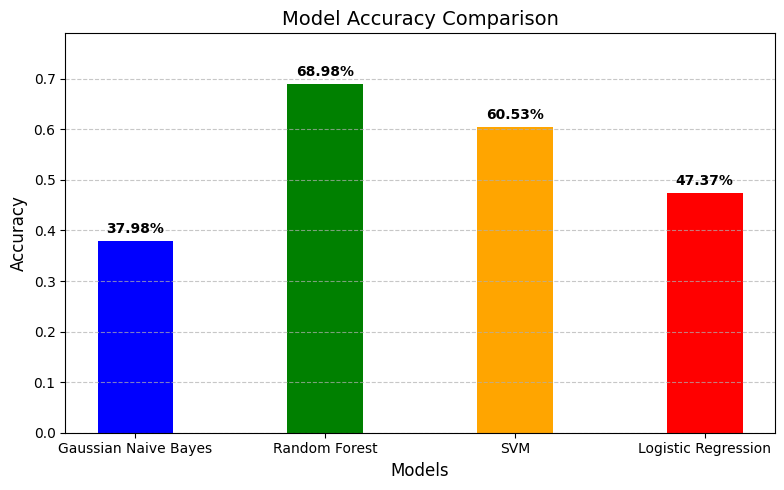

In [25]:
import matplotlib.pyplot as plt

model_names = ["Gaussian Naive Bayes", "Random Forest", "SVM", "Logistic Regression"]
accuracy_scores = [0.3798, 0.6898, 0.6053, 0.4737]  # Actual accuracies

plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, accuracy_scores, color=['blue', 'green', 'orange', 'red'], width=0.4)

# Write accuracy on top of each bar
for bar, acc in zip(bars, accuracy_scores):
    plt.text(
        bar.get_x() + bar.get_width() / 2,   # center x
        bar.get_height() + 0.01,             # slightly above bar
        f"{acc * 100:.2f}%",                 # display as percentage
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy Comparison', fontsize=14)

# ✅ Dynamic y-axis range based on your data
plt.ylim(0, max(accuracy_scores) + 0.1)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


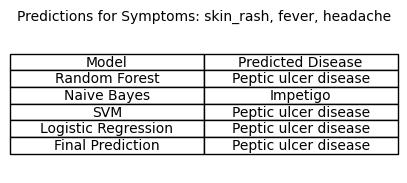

,Model,Predicted Disease
0,Random Forest,Peptic ulcer disease
1,Naive Bayes,Impetigo
2,SVM,Peptic ulcer disease
3,Logistic Regression,Peptic ulcer disease
4,Final Prediction,Peptic ulcer disease


In [17]:
from statistics import mode
import pandas as pd
import matplotlib.pyplot as plt

symptoms = X.columns.values
symptom_index = {symptom: idx for idx, symptom in enumerate(symptoms)}

def predict_disease(input_symptoms):
    input_symptoms = input_symptoms.split(",")
    input_data = [0] * len(symptom_index)
    
    for symptom in input_symptoms:
        if symptom.strip() in symptom_index:
            input_data[symptom_index[symptom.strip()]] = 1

    input_df = pd.DataFrame([input_data], columns=symptoms)

    rf_pred = encoder.classes_[rf_model.predict(input_df)[0]]
    nb_pred = encoder.classes_[nb_model.predict(input_df)[0]]
    svm_pred = encoder.classes_[svm_model.predict(input_df)[0]]
    lr_pred = encoder.classes_[lr_model.predict(input_df)[0]]

    final_pred = mode([rf_pred, nb_pred, svm_pred, lr_pred])

    # Create a dataframe for nice display
    results_df = pd.DataFrame({
        "Model": ["Random Forest", "Naive Bayes", "SVM", "Logistic Regression", "Final Prediction"],
        "Predicted Disease": [rf_pred, nb_pred, svm_pred, lr_pred, final_pred]
    })

    # Display as table
    fig, ax = plt.subplots(figsize=(5, 1.8))
    ax.axis('off')
    ax.axis('tight')
    ax.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center')
    plt.title(f"Predictions for Symptoms: {', '.join(input_symptoms)}", fontsize=10, pad=10)
    plt.show()

    return results_df

# Example test
predict_disease("skin_rash,fever,headache")


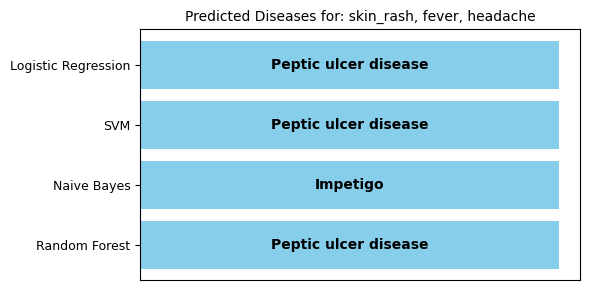

🩺 Final Predicted Disease: Peptic ulcer disease


In [18]:
def predict_disease_with_plot(input_symptoms):
    input_symptoms = input_symptoms.split(",")
    input_data = [0] * len(symptom_index)
    
    for symptom in input_symptoms:
        if symptom.strip() in symptom_index:
            input_data[symptom_index[symptom.strip()]] = 1

    input_df = pd.DataFrame([input_data], columns=symptoms)

    rf_pred = encoder.classes_[rf_model.predict(input_df)[0]]
    nb_pred = encoder.classes_[nb_model.predict(input_df)[0]]
    svm_pred = encoder.classes_[svm_model.predict(input_df)[0]]
    lr_pred = encoder.classes_[lr_model.predict(input_df)[0]]

    final_pred = mode([rf_pred, nb_pred, svm_pred, lr_pred])

    preds = {
        "Random Forest": rf_pred,
        "Naive Bayes": nb_pred,
        "SVM": svm_pred,
        "Logistic Regression": lr_pred
    }

    # Plot horizontal bar chart
    plt.figure(figsize=(6, 3))
    plt.barh(list(preds.keys()), [1]*len(preds), color='skyblue')
    for i, (model, pred) in enumerate(preds.items()):
        plt.text(0.5, i, pred, ha='center', va='center', fontsize=10, fontweight='bold')
    plt.title(f"Predicted Diseases for: {', '.join(input_symptoms)}", fontsize=10)
    plt.xticks([])
    plt.yticks(fontsize=9)
    plt.tight_layout()
    plt.show()

    print(f"🩺 Final Predicted Disease: {final_pred}")

# Example
predict_disease_with_plot("skin_rash,fever,headache")
